In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk # SkLearn ML library
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import requests
from datetime import datetime

# Input data files are available in the "austin-bike" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "austin-bike"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# load data in 

trips = pd.read_csv('austin-bike/austin_bikeshare_trips.csv')
stations = pd.read_csv('austin-bike/austin_bikeshare_stations.csv')
weather = pd.read_csv('austin-bike/austin_weather.csv')


austin_bikeshare_stations.csv
austin_bikeshare_trips.csv
austin_weather.csv



In [2]:
Rain = []
Thunderstorm = []
Fog = []
Snow = []
for row in weather['Events']:
    if 'Rain' in row:
        Rain.append(1)
    else:
        Rain.append(0)
        
    if 'Thunderstorm' in row:
        Thunderstorm.append(1)
    else:
        Thunderstorm.append(0)
        
    if 'Fog' in row:
        Fog.append(1)
    else:
        Fog.append(0)
        
    if 'Snow' in row:
        Snow.append(1)
    else:
        Snow.append(0)
weather['PrecipitationSumInches'] = np.where(weather['PrecipitationSumInches'] == 'T', 0.001, weather['PrecipitationSumInches'])
weather['Rain'] = Rain
weather['Thunderstorm'] = Thunderstorm
weather['Fog'] = Fog
weather['Snow'] = Snow

In [3]:
weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,Rain,Thunderstorm,Fog,Snow
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,2,20,4,31,0.46,"Rain , Thunderstorm",1,1,0,0
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,5,16,6,25,0,,0,0,0,0
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,10,8,3,12,0,,0,0,0,0
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,7,12,4,20,0,,0,0,0,0
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,7,10,2,16,0.001,,0,0,0,0


In [4]:
# test to see if all values in a column are numeric.
pd.to_numeric(weather.WindHighMPH)


ValueError: Unable to parse string "-" at position 596

In [5]:
weather.HumidityAvgPercent[weather.HumidityAvgPercent == '-'] = 0
weather.WindHighMPH[weather.WindHighMPH == '-'] = 0
weather.PrecipitationSumInches[weather.PrecipitationSumInches == 'T'] = 0

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
len(weather)

1319

In [7]:
trips.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [8]:
pd.to_numeric(trips.start_station_id)
trips.isnull().sum()

bikeid                  723
checkout_time             0
duration_minutes          0
end_station_id        19842
end_station_name          0
month                 30752
start_station_id      19041
start_station_name        0
start_time                0
subscriber_type        2077
trip_id                   0
year                  30752
dtype: int64

In [9]:
import dateutil.parser
t = pd.to_datetime(trips.start_time)
trips['month'] = t.map(lambda x: x.month)
trips['year'] = t.map(lambda x: x.year)


In [10]:
trips.isnull().sum()

bikeid                  723
checkout_time             0
duration_minutes          0
end_station_id        19842
end_station_name          0
month                     0
start_station_id      19041
start_station_name        0
start_time                0
subscriber_type        2077
trip_id                   0
year                      0
dtype: int64

In [11]:
dailyStats = pd.DataFrame()
dailyStats['date'] = weather['Date'].values.tolist()
dailyStats['TempAvgF'] = weather['TempAvgF'].values.tolist()
dailyStats['Humidity'] = weather['HumidityAvgPercent'].values.tolist()
dailyStats['WindMPH'] = weather['WindHighMPH'].values.tolist()
dailyStats['Precipitation'] = weather['PrecipitationSumInches'].values.tolist()
dailyStats['Rain'] = Rain
dailyStats['Fog'] = Fog
dailyStats['Thunderstorm'] = Thunderstorm
dailyStats['Snow'] = Snow


In [12]:
dailyStats.tail()

,date,TempAvgF,Humidity,WindMPH,Precipitation,Rain,Fog,Thunderstorm,Snow
1314,2017-07-27,89,54,12,0,0,0,0,0
1315,2017-07-28,91,54,14,0,0,0,0,0
1316,2017-07-29,92,51,12,0,0,0,0,0
1317,2017-07-30,93,48,13,0,0,0,0,0
1318,2017-07-31,88,43,12,0,0,0,0,0


In [13]:
# create our own month, year and weekend column 
dailyStats['Month'] = t.map(lambda x: x.month)
dailyStats['Year'] = t.map(lambda x: x.year)
dailyStats['weekend'] = t.map(lambda x: 1 if x.dayofweek > 4 else 0)
del dailyStats['date']

# do a one hot encode on months and years
oneHotMonths = pd.get_dummies(dailyStats.Month)
dailyStats['Jan'] = oneHotMonths[1]
dailyStats['Feb'] = oneHotMonths[2]
dailyStats['Mar'] = oneHotMonths[3]
dailyStats['Apr'] = oneHotMonths[4]
dailyStats['May'] = oneHotMonths[5]
dailyStats['Jun'] = oneHotMonths[6]
dailyStats['Jul'] = oneHotMonths[7]
dailyStats['Aug'] = oneHotMonths[8]
dailyStats['Sep'] = oneHotMonths[9]
dailyStats['Oct'] = oneHotMonths[10]
dailyStats['Nov'] = oneHotMonths[11]
dailyStats['Dec'] = oneHotMonths[12]

oneHotYears = pd.get_dummies(dailyStats.Year)
dailyStats['is2013'] = oneHotYears[2013]
dailyStats['is2014'] = oneHotYears[2014]
dailyStats['is2015'] = oneHotYears[2015]
dailyStats['is2016'] = oneHotYears[2016]
dailyStats['is2017'] = oneHotYears[2017]

del dailyStats['Year']
del dailyStats['Month']
dailyStats.head()

,TempAvgF,Humidity,WindMPH,Precipitation,Rain,Fog,Thunderstorm,Snow,weekend,Jan,...,Aug,Sep,Oct,Nov,Dec,is2013,is2014,is2015,is2016,is2017
0,60,75,20,0.46,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,48,68,16,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,45,52,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,46,56,12,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,50,71,10,0.001,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## daily trip aggregates


In [15]:
# add a date column that contains 
import dateutil.parser
trips['date'] = trips['start_time'].map(lambda x: dateutil.parser.parse(x).date())
trips['date'] = trips['date'].map(lambda x: x.strftime('%Y-%m-%d'))

idx = pd.date_range('2013-12-21', '2017-07-31')

tripCount = trips.date.value_counts()
print(len(tripCount))
tripCount.index = pd.DatetimeIndex(tripCount.index)
tripCount = tripCount.reindex(idx, fill_value=0)
dailyStats.drop(dailyStats.index[tripCount == 0],inplace=True)
tripCount.drop(tripCount.index[tripCount == 0],inplace=True)

tripCount.sort_index(inplace=True)
tripCount.tail()


1257


2017-07-27    370
2017-07-28    402
2017-07-29    425
2017-07-30    365
2017-07-31    344
Name: date, dtype: int64

In [23]:
tripCount.reset_index(drop=True,inplace=True)
dailyStats.reset_index(drop=True,inplace=True)

In [24]:
X_train = dailyStats[dailyStats.index<1107]
X_test = dailyStats[dailyStats.index>=1107]
len(X_train)

1107

In [25]:
print(len(weather))

1319


In [26]:
print(len(tripCount))
print(len(dailyStats))

1257
1257


In [27]:
y_train = tripCount[tripCount.index<1107]
y_test = tripCount[tripCount.index>=1107]

In [28]:
print(len(y_test))
print(len(X_test))

150
150


In [29]:
X_train.head()

,TempAvgF,Humidity,WindMPH,Precipitation,Rain,Fog,Thunderstorm,Snow,weekend,Jan,...,Aug,Sep,Oct,Nov,Dec,is2013,is2014,is2015,is2016,is2017
0,60,75,20,0.46,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,48,68,16,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,45,52,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,46,56,12,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,50,71,10,0.001,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
y_train.head()

0    103
1    117
2     96
3     85
4    145
Name: date, dtype: int64

## start some machine learning!

In [31]:
# import our machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import model_selection, preprocessing

t = np.arange(0,len(y_test))

In [32]:
# this function will be how we measure error
# it is the root mean squared logarithmic error
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [33]:
X_train.head()

,TempAvgF,Humidity,WindMPH,Precipitation,Rain,Fog,Thunderstorm,Snow,weekend,Jan,...,Aug,Sep,Oct,Nov,Dec,is2013,is2014,is2015,is2016,is2017
0,60,75,20,0.46,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,48,68,16,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,45,52,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,46,56,12,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,50,71,10,0.001,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


The accuracy of linear regression is:  -0.20967611016028287 
The RMSLE is:  0.46940057917387346


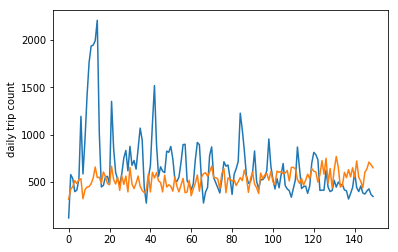

In [34]:
clf = LinearRegression(normalize= True)
clf.fit(X_train, y_train)
print("The accuracy of linear regression is: ", clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))
plt.plot(t,y_test,t,clf.predict(X_test))
plt.ylabel('daily trip count')
plt.show()

The accuracy of ridge regression is:  -0.2136608231041761 
The RMSLE is:  0.4671419051667111


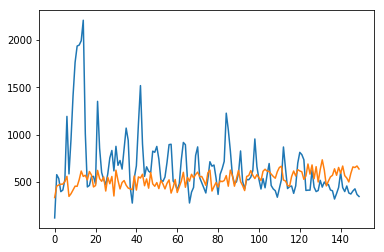

In [35]:
clf = Ridge(alpha=0.1)
clf.fit(X_train, y_train)
print("The accuracy of ridge regression is: ", clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))
plt.plot(t,y_test,t,clf.predict(X_test))
plt.show()

The accuracy of lasso regression is:  -0.21549214875497102 
The RMSLE is:  0.4675864866993462


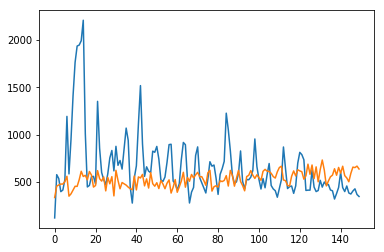

In [36]:
clf = Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print("The accuracy of lasso regression is: ", clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))
plt.plot(t,y_test,t,clf.predict(X_test))

The accuracy of logistic regression is:  0.0 
The RMSLE is:  0.6736971460825062


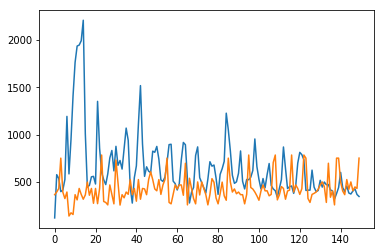

In [37]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("The accuracy of logistic regression is: ", clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))
plt.plot(t,y_test,t,clf.predict(X_test))

The accuracy of Decision Tree Regressor is:  -0.30669885204083425 
The RMSLE is:  0.47209757275559466


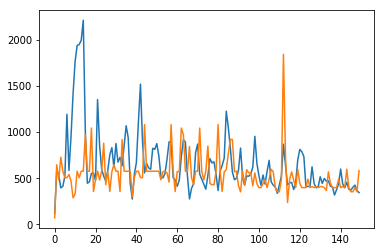

In [38]:
clf = DecisionTreeRegressor(min_samples_leaf = 3,max_depth = 8,random_state = 2)
clf.fit(X_train, y_train)
print("The accuracy of Decision Tree Regressor is: ", clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))
plt.plot(t,y_test,t,clf.predict(X_test))

The accuracy of Random Forest Regressor is:  -0.011752251096315947 
The RMSLE is:  0.40726652695391435


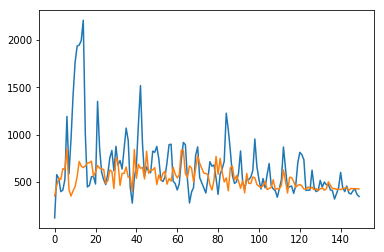

In [39]:
clf = RandomForestRegressor(n_estimators= 200,min_samples_leaf = 20,random_state = 42)
clf.fit(X_train, y_train)
print('The accuracy of Random Forest Regressor is: ', clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))
plt.plot(t,y_test,t,clf.predict(X_test))

The accuracy of Gradient Boosting Regressor is:  -0.3214290655863594 
The RMSLE is:  0.5064088190480858


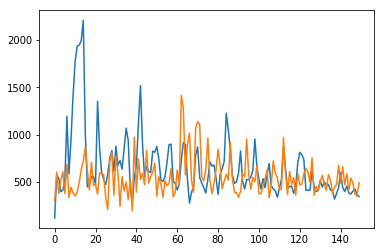

In [40]:
clf = GradientBoostingRegressor(learning_rate = 0.12,n_estimators = 150,max_depth = 8,min_samples_leaf = 1,random_state = 2)
clf.fit(X_train, y_train)
print('The accuracy of Gradient Boosting Regressor is: ', clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))
plt.plot(t,y_test,t,clf.predict(X_test))

The accuracy of Gradient Boosting Regressor is:  0.024466657749246612 
The RMSLE is:  0.3969756205099329


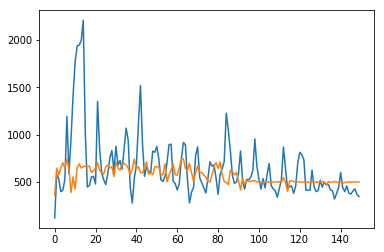

In [41]:
clf = AdaBoostRegressor(n_estimators = 100,learning_rate = 0.01,loss = 'linear',random_state = 2)
clf.fit(X_train, y_train)
print('The accuracy of Gradient Boosting Regressor is: ', clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))
plt.plot(t,y_test,t,clf.predict(X_test))

The accuracy of Support Vector Regression is:  -0.4954850448301511 
The RMSLE is:  0.5496416311805521


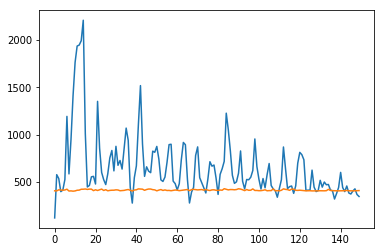

In [42]:
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
print('The accuracy of Support Vector Regression is: ', clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))
plt.plot(t,y_test,t,clf.predict(X_test))

The accuracy of Multilayer Perceptron Regressor is:  -3.6499116194894654 
The RMSLE is:  4.176194724113157


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


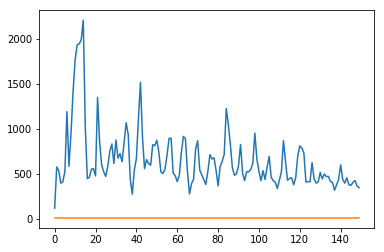

In [43]:
clf = MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1)
clf.fit(X_train, y_train)
print('The accuracy of Multilayer Perceptron Regressor is: ', clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))
plt.plot(t,y_test,t,clf.predict(X_test))

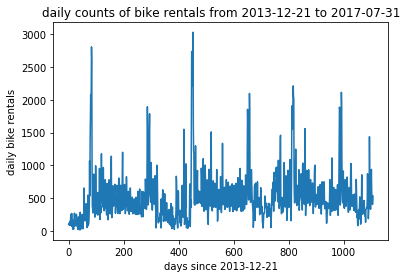

In [44]:
tr = np.arange(0, len(y_train))
plt.plot(tr,y_train)
plt.title('daily counts of bike rentals from 2013-12-21 to 2017-07-31')
plt.ylabel('daily bike rentals')
plt.xlabel('days since 2013-12-21')
plt.show()